In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('shopping_trends_updated.csv')

## Veri Setinin İncelenmesi

In [3]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
data.describe()
# numerik verilerimizin özeti

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


**Veri setimizde hem numerik hem de kategorik veriler bulunuyor.**

In [6]:
data.shape

(3900, 18)

In [7]:
data.isna().sum()
# Hiç na değerimiz yok.

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

## Keşifsel Veri Analizi

#### Müşterilerin Yaş Dağılımı

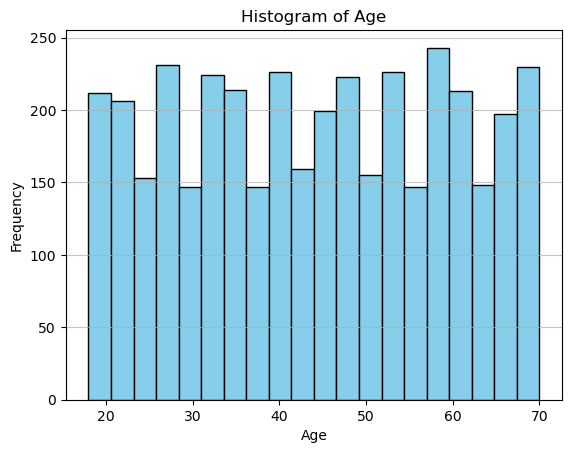

In [10]:
data["Age"].plot(kind="hist", bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)

#### Cinsiyet Dağılımı

<Axes: >

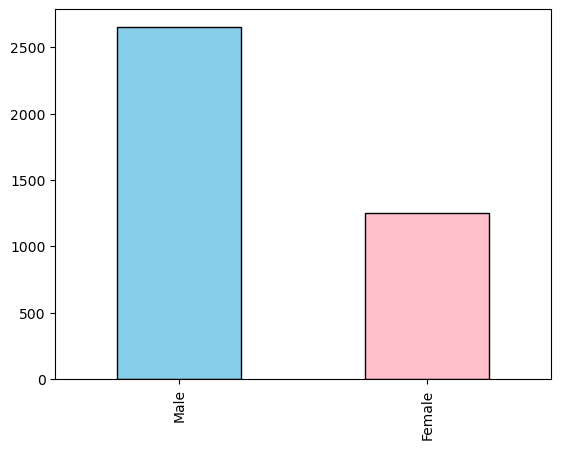

In [11]:
data["Gender"].value_counts().plot(kind="bar", color=['skyblue', 'pink'], edgecolor='black')

#### Kategorilere Göre Ortalama Harcamalar

In [12]:
data.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending=False)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

#### Üyelik Durumu

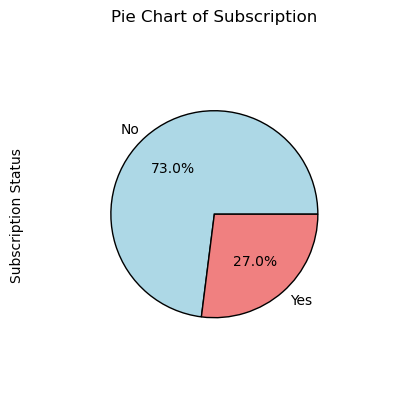

In [13]:
data["Subscription Status"].value_counts().plot(kind="pie", autopct='%1.1f%%', 
                                                colors=['lightblue', 'lightcoral'], 
                                                wedgeprops=dict(edgecolor='black'), 
                                                center=(0, 0), radius=0.7)
plt.title("Pie Chart of Subscription")
plt.show()

#### Tercih Edilen Ürünlerdeki Renk Dağılımı

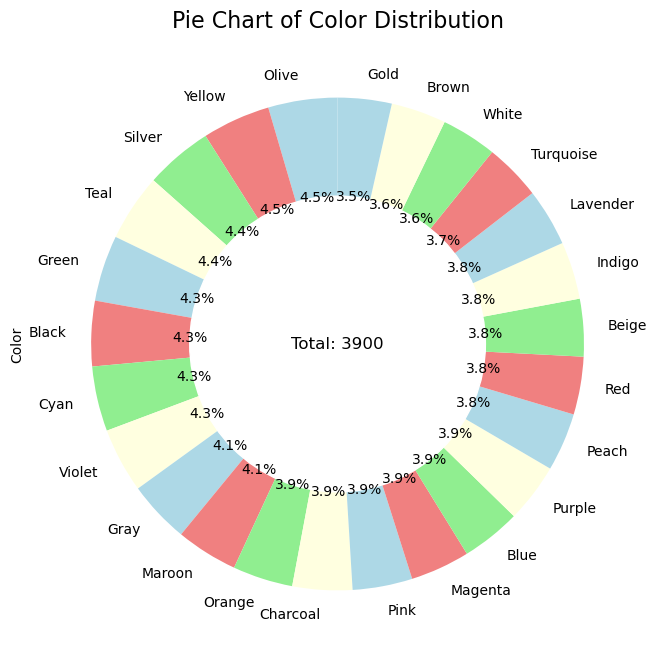

In [14]:
color_counts = data["Color"].value_counts()
plt.figure(figsize=(8, 8))
color_counts.plot(kind="pie", 
                  autopct='%1.1f%%', 
                  startangle=90, 
                  colors=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'])

plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title("Pie Chart of Color Distribution", fontsize=16)
plt.annotate("Total: {}".format(color_counts.sum()), xy=(0, 0), fontsize=12, ha='center', va='center')
plt.show()

#### Sezonlara Göre Alışveriş Yapma Durumları

In [15]:
data.groupby("Season")["Purchase Amount (USD)"].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

#### Alışveriş Sıklığına Göre Harcama Miktarları

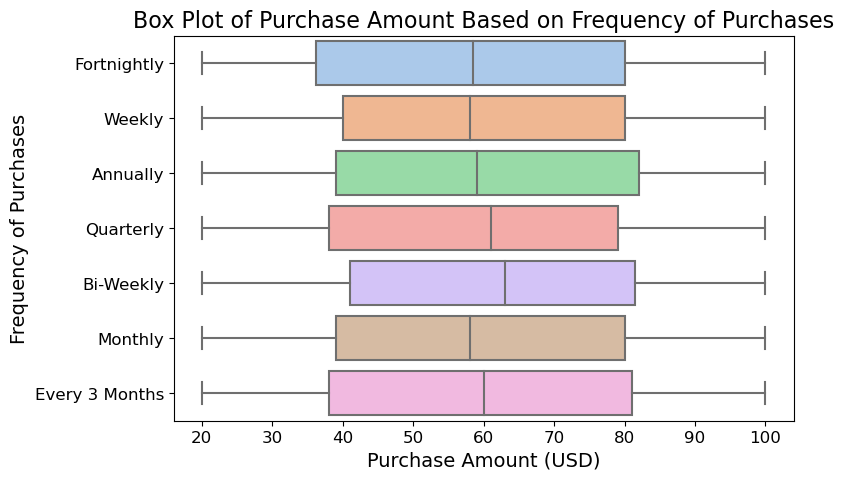

In [16]:
plt.figure(figsize=(8, 5))

sns.boxplot(x="Purchase Amount (USD)", y="Frequency of Purchases", data=data, palette="pastel")

plt.title("Box Plot of Purchase Amount Based on Frequency of Purchases", fontsize=16)
plt.xlabel("Purchase Amount (USD)", fontsize=14)
plt.ylabel("Frequency of Purchases", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### Tercih Edilen Ödeme Yöntemi

In [17]:
data["Payment Method"].value_counts().sort_values(ascending = False)

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64

#### Konuma Göre Yapılan Ortalama Alışveriş (Her Bir Ürün Kategorisi İçin)

In [18]:
pd.pivot_table(data, values="Purchase Amount (USD)", index= "Location", columns= "Item Purchased", aggfunc="mean").head()

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.500000,52.0,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.2,54.333333,49.000000,68.666667,79.500000,93.50,62.666667,40.500000,52.50
Alaska,74.6,76.750000,67.5,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.5,80.000000,76.666667,87.333333,73.333333,74.25,83.000000,50.333333,56.75
Arizona,48.6,84.500000,61.0,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.0,87.000000,46.000000,68.500000,78.500000,61.00,66.000000,70.400000,62.00
Arkansas,90.0,55.000000,66.0,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.0,59.500000,95.000000,44.500000,69.000000,60.50,56.000000,71.500000,52.00
California,57.4,61.666667,39.5,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.8,NaN,63.333333,56.000000,73.000000,83.00,69.400000,42.000000,69.00


### Veri Setini Hazır Hale Getirme

In [19]:
le = LabelEncoder()
data["Frequency of Purchases"] = le.fit_transform(data["Frequency of Purchases"])
X = data[['Frequency of Purchases', 'Age',"Purchase Amount (USD)"]]
X

,Frequency of Purchases,Age,Purchase Amount (USD)
0,3,55,53
1,3,19,64
2,6,50,73
3,6,21,90
4,0,45,49
...,...,...,...
3895,6,40,28
3896,1,52,49
3897,5,46,33
3898,6,44,77


In [20]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency of Purchases,3900.0,2.974872,1.998559,0.0,1.0,3.0,5.0,6.0
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0


In [21]:
X.corr()

,Frequency of Purchases,Age,Purchase Amount (USD)
Frequency of Purchases,1.000000,0.017406,-0.017219
Age,0.017406,1.000000,-0.010424
Purchase Amount (USD),-0.017219,-0.010424,1.000000


## K- Means Kümeleme

In [22]:
kmeans = KMeans(n_clusters=3,init="k-means++" )
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 2, 0, ..., 1, 0, 0])

## Görselleştirme

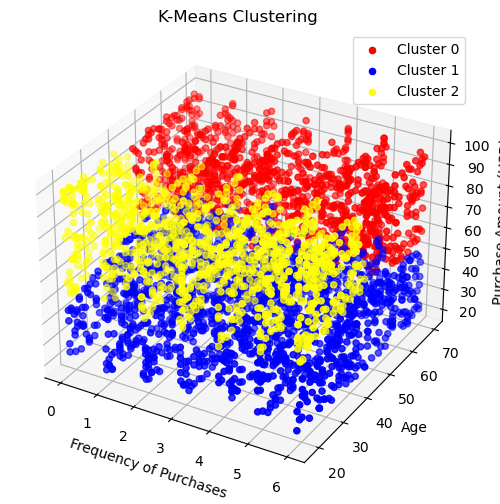

In [23]:
def plot_3d_clusters(y_pred,cluster_type) :
      fig = plt.figure(figsize=(8, 6))
      ax = fig.add_subplot(111, projection='3d')

      colors = ['red', 'blue', 'yellow']
      for cluster_label in range(3):
            ax.scatter(X[y_pred == cluster_label]['Frequency of Purchases'],
                              X[y_pred == cluster_label]['Age'],
                              X[y_pred == cluster_label]["Purchase Amount (USD)"],
                              label=f'Cluster {cluster_label}', c=colors[cluster_label])


      ax.set_xlabel('Frequency of Purchases')
      ax.set_ylabel('Age')
      ax.set_zlabel('Purchase Amount (USD)',)
      ax.set_title(f'{cluster_type} Clustering ')
      ax.legend()
      plt.show()
plot_3d_clusters(kmeans.labels_,"K-Means")

## WCSS

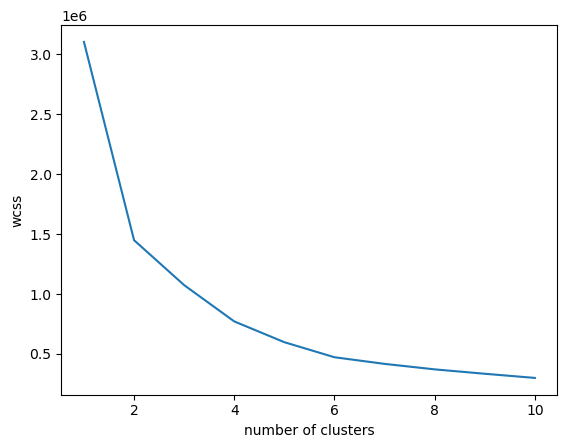

In [24]:
wcss = []
for i in range(1,11):       #range value
  kmeans = KMeans( n_clusters=i , init="k-means++" , random_state = 42,n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

#plotting graph
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

## Hiyerarşik Kümeleme (Birleştirici)

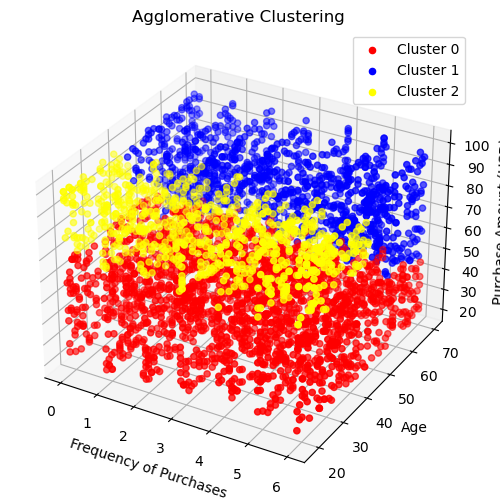

In [25]:
ac = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_pred = ac.fit_predict(X)
y_pred
plot_3d_clusters(y_pred,"Agglomerative")

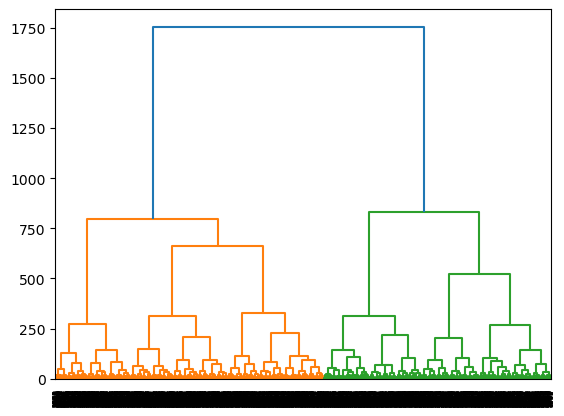

In [26]:
dendogram = sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()